# Tutorial Introduction:
When studying data science, the best way to learn a particular topic is to teach it to others. This assignment is aimed to gives students the opportunity to do just that by requiring a tutorial of a suitable data science project.

The state of Mississippi is traditionally viewed in the U.S. as one of the least educated states (at the high school level). Year end year out rankings forecast the state in a negative light typically placing easily in the bottom 10 of states. Recently, the state has started to place in the bottom 5 (46-50) coming in at 48/50 on USA Today ranking. https://www.usatoday.com/story/money/economy/2018/02/08/geographic-disparity-states-best-and-worst-schools/1079181001/
The ranking systems typically look at factors such as high school graduation rate, public school spending, 8th grade NAEP proficiency scores, adults with at least a bachelor's degree, highest high school grade, lowest high school grade, and many more. Two additional credible sources, CNBC and Forbes, land the state of Mississippi dead last in their rankings.
https://www.cnbc.com/2018/01/23/the-10-most-and-least-educated-states-in-2018.html
https://www.forbes.com/sites/karstenstrauss/2018/02/01/the-most-and-least-educated-states-in-the-u-s-in-2018/#4d0fc9e451e1
What if there was a way to geographically represent some of this data and begin to attempt to draw some tentative conclusions relating this data to other factors (income levels, etc.).

Here we aim to not only show students how to utilize and implement some basic geopandas features but we apply those features to a data science for social good themed problem. 


## GeoPandas
GeoPandas is an open source project that works with data that can be represented geospatially and makes it represented in python easier. It works by combining the functionality of pandas and shapely together. The geospatial implementation allows users to use pandas datatypes to visualize spatial operations on geometric features(latitude and longitude data). GeoPandas can allow users to potentially find spatial patterns in data that may be present. 
www.goepandas.org

## Shapefile
Shapefile is an open vector formatting specification platform developed by ESRI. It is useful for the exchange and storing of GIS information consisting of files with the same base name. When using shapefile, there are three mandatory files. The first main file is the .shp file which is the shape format containing the feature geometry. The next mandatory file is the .shx file which shapes the index format which allows seeking to be done quickly. The last mandatory file when using shapefile is the .dbf file. This file is a columnar attributes format of each shape. Make sure that these files are in an uncompressed folder with the jupyter notebook file that you are using. The shapefile will contain pertinent information that will outline the state of Mississippi.

### Tutorial Content
In this tutorial, we will show how to implement and represent basis graphical and geospatial analysis in Pyton with the help of built-in libraries.

Data that will be used to help support this study was collected from the Mississippi Automated Resource Information System (MARIS) http://www.maris.state.ms.us/HTM/DownloadData/Statewide.html and Mississippi Today (MT) "2017 Public School District Grades" https://mississippitoday.org/data/2017-public-school-district-grades/. The two sources are pivotal for the implementation of the example portion of this study. The MARIS Dataset was helpful in possessing the neccessary shape length, shape area, and geometry information as it relates to a given school district. The MT Dataset was helpful in supplying the public school district grades for 2016 and 2017 and other interesting parameters such as graduation rate, change in graduation rate (last 3 school years), and the enrollment numbers for a given school to name a few. The data will need to be downloaded. The MARIS data will come in a zip file that will need to be unzipped before using. This process was completed with the help of 7 Zip File Mangager. The MT data will be in the form of a CSV file. Later in the study there will be a section detailing how to combine these two files together.

This study will aim to address and cover the following topics:
1. loading and analyzing data to understand before using
2. reading in a specific shapefile to be used for geopandas application
3. represent data geospatially in a generic way
4. explanation of how to convert csv file into shapefile
5. merge two datasets
6. graphically and geospatially showcase data to gain further insight into the data

## Initial Steps: Library Installation
To begin this tutorial, it is imperative that geopandas and shapely are installed on your machine. To test if geopandas is installed on the system, we simply ask the system.

In [1]:
import sys
import geopandas as gpd
#'shapely' in sys.modules
'geopandas' in sys.modules


True

If the request had retrun False, then one would need to install the needed library. This can be done in the command window by using pip install and "the name of the needed library". Now that it is confirmed that both geopandas and shapely are installed, we import in additional libraries that may be of assistance.

* If additinal assistance is needed with help with installing packages, simply google installing in python and you should get tons of help and feedback.

In [2]:
import csv
import sqlite3
import pandas as pd
import math
import numpy as np
# Use svg backend for better quality
import matplotlib
# AUTOLAB_IGNORE_START
matplotlib.use("svg")
# AUTOLAB_IGNORE_STOP
import matplotlib.pyplot as plt
#from shapely.geometry import Point

### Loading and Analyzing Data to Understand the Dataset
Before working with any data, it is important that it is analyzed before used. The first step is to import the shapefile that has columns of data related to a geospatial location. The data is essentially assigned to a lat/long geometry polygon value. Here in this section, the code is requesting basis information to understand what features are present. Here individualized entries can be isolated to see exactly what parameters are there for a specific county without all the other data being present.

In [168]:
#importing shapefile to be able to read shapefile data
import osgeo.ogr
#import shapefile
shapefile = osgeo.ogr.Open("psd15_16.shp")
#tracts = gpd.GeoDataFrame.from_file(shapefile)
numLayers = shapefile.GetLayerCount()
print("Shapefile contains %d layers" % numLayers)


for layerNum in range(numLayers):  
    layer = shapefile.GetLayer(layerNum)  
    spatialRef = layer.GetSpatialRef().ExportToProj4()  
    numFeatures = layer.GetFeatureCount()  
    print ("Layer %d has spatial reference %s" % (layerNum, spatialRef))
    print ("Layer %d has %d features:" % (layerNum, numFeatures))
    print
 

Shapefile contains 1 layers
Layer 0 has spatial reference +proj=tmerc +lat_0=32.5 +lon_0=-89.75 +k=0.9998335 +x_0=500000 +y_0=1300000 +datum=NAD83 +units=m +no_defs 
Layer 0 has 144 features:


In [169]:
#Specifically isolating 1 feature to analyze the information only related to that feature 
feature = layer.GetFeature(0)
print("Feature 2 has the following attributes:")
attributes = feature.items()
print(attributes)
for key,value in attributes.items():
    print("  %s = %s" % (key, value))
geometry = feature.GetGeometryRef() 
geometryName = geometry.GetGeometryName()
print("Feature's geometry data consists of a %s" % geometryName)

Feature 2 has the following attributes:
{'NAME': 'Aberdeen School District', 'FID_12': 72, 'STATEFP': '28', 'UNSDLEA': '00360', 'GEOID': '2800360', 'LSAD': '00', 'LOGRADE': 'PK', 'HIGRADE': '12', 'MTFCC': 'G5420', 'SDTYP': None, 'FUNCSTAT': 'E', 'ALAND': 557125576.0, 'AWATER': 4010989.0, 'INTPTLAT': '+33.8031740', 'INTPTLON': '-088.6071574', 'Shape_Leng': 127849.314587, 'Shape_Area': 561104504.074, 'test': None, 'test_1': None, 'test_2': None, 'test_3': None, 'test_4': None}
  NAME = Aberdeen School District
  FID_12 = 72
  STATEFP = 28
  UNSDLEA = 00360
  GEOID = 2800360
  LSAD = 00
  LOGRADE = PK
  HIGRADE = 12
  MTFCC = G5420
  SDTYP = None
  FUNCSTAT = E
  ALAND = 557125576.0
  AWATER = 4010989.0
  INTPTLAT = +33.8031740
  INTPTLON = -088.6071574
  Shape_Leng = 127849.314587
  Shape_Area = 561104504.074
  test = None
  test_1 = None
  test_2 = None
  test_3 = None
  test_4 = None
Feature's geometry data consists of a POLYGON


In [170]:
#Specifically showcasing all the data that is present in psd15_16.shp
read = gpd.read_file('psd15_16.shp')#to_crs({'init' :'epsg:4326'})
#dista = gpd.read_file(gpd.datasets.get_path('rpublic_schools15.shp'))
read.head()
%matplotlib inline
#dista.plot(column='f13', categorical=True)
print(read)

                                                  NAME  FID_12 STATEFP  \
0                             Aberdeen School District      72      28   
1                               Alcorn School District     130      28   
2                         Amite County School District      47      28   
3                                Amory School District      71      28   
4                        Attala County School District     104      28   
5                              Baldwyn School District      52      28   
6                        Bay St. Louis School District     141      28   
7                        Benton County School District     109      28   
8                        Biloxi Public School District      79      28   
9                           Booneville School District      51      28   
10                          Brookhaven School District     101      28   
11                      Calhoun County School District     118      28   
12                       Canton Public

#### Data Showcase
The following shows the data represented geospatialially as it relates to the different county districts. 
1. The first is represented with the ID information of each county. Each county is its own entity which is the reasoning for the multi colored graph.
2. The second graph is represented with the lowest school grade for a given county. The lowest school grade chart only has two colors as the only options here are binary between kindergarden and pre-kindergarden.
3. The last graph shown here is a representation of the highest school grade for a given county. The highest school grade chart only has one possilbe answer as each county goes up to the 12th grade.


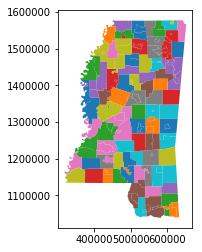

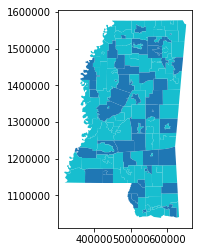

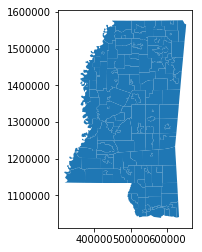

In [171]:
read.plot(column = 'FID_12', categorical= True);
read.plot(column = 'LOGRADE', categorical= True);
read.plot(column = 'HIGRADE', categorical = True);

The entire data set represents data that is describes and tagged to a specific county(school district name). The various school districts are represented below with their ID in the above graph and their lowest grade offered in the bottom graph.

In [37]:
#dista.plot(column='f13',categorical=True)
#shple = []
#shpare = []
#geo = []
    
#for line in dista:
#    shpl = line[3]
#    shpar = line[2]
        
#    shple.append(shpl)
#     shpare.append(shpar)
#print(shple)
#print(shpare)

By chance, if one is interested in viewing the data geometry in centroid form, simply uncomment the next three lines and you should be good to go. There are other ways to represent the data, this is just one alternative option.

In [8]:
#read['centroid_column'] = dista.centroid
#read = dista.set_geometry('centroid_column')
#read.plot(column ='FID_12', categorical=True)


## CSV Data and Limitations
CSV stands for comman-separated values that store tabular data of numbers and text in plain text. Each entry in the data file is separated by commas.There are a few limitations when dealing with files of different types. CSV.reader does not present the file in scriptable form so one would need to change the file format to make the file scriptable. Here below is importing the csv file into the notebook and manipulating it to only return the first three columns of the dataset. This analyzes is to verify that the data that is wanted for future exercises is present before proceeding with the conversion of the file. Once this is shown to be true, we proceed to converting the file. This will be discussed in the next text section.

In [172]:
import csv
#ifile = open('mshsdata.csv', "r")
#read = csv.reader(ifile)
#for row in read:
#    print(row)
with open('mshsdata.csv', 'r') as f:
    msdatareader = csv.reader(f)
    
    newOG = []
    oldOG = []
    
    for line in msdatareader:
        print(line[0], line[1], line[2])
        neOG = line[1]
        olOG = line[2]
        
        newOG.append(neOG)
        oldOG.append(olOG)
    print(newOG)
    print(oldOG)
#    print(dista + newOG) 
#df['scores'] = df['dista'] + df

NAME 2017 _OG 2016_OG
Aberdeen School District C C
Alcorn School District B B
Amite County School District D F
Amory School District B C
Attala County School District C C
Baldwyn School District B B
Bay St Louis Waveland School District B B
Benton County School District B C
Biloxi Public School District A B
Booneville School District A A
Brookhaven School District C C
Calhoun County School District C C
Canton Public School District D F
Carroll County School District C D
Chickasaw County School District D D
Choctaw County School District C C
Claiborne County School District D F
Clarksdale Municipal School District D F
Cleveland School District D C
Clinton Public School District A A
Coahoma County Ahs B C
Coahoma County School District D F
Coffeeville School District C D
Columbia School District C B
Columbus Municipal School District D D
Copiah County School District C C
Covington County Schools D C
DeSoto County School District A A
Durant Public School District D D
East Jasper Consolida

In [173]:
import ogr
source = ogr.Open('psd15_16.shp', update=True)
layer = source.GetLayer()
#print(source)

#Add an ID field
idField = ogr.FieldDefn("test", ogr.OFTInteger)
layer.CreateField(idField)

#Check the feature and set values
featureDefn = layer.GetLayerDefn()
feature = ogr.Feature(featureDefn)
#feature.SetGeometry(poly)
feature.SetField("test", 1)
layer.CreateFeature(feature)
feature = None
print(featureDefn)
print(source)

<osgeo.ogr.FeatureDefn; proxy of <Swig Object of type 'OGRFeatureDefnShadow *' at 0x000002301CA3C870> >
<osgeo.ogr.DataSource; proxy of <Swig Object of type 'OGRDataSourceShadow *' at 0x000002301CA3C540> >


# Merging Data
Pandas provides various capabilities for easily and successfully combining dataframes with set logic that allows user to join exactly the desired datasets however they would like. Pandas has full-featured, high performance operations very similar to SQL. Merge is a entry point for all standard databases to join. To further understand ways to merge data, visit https://pandas.pydata.org/pandas-docs/stable/merging.html

After converting the mshsdata.csv to a shapefile, msdata.dbf, the data is loaded into the geopandas by the read_file option. Based upon certain columns in the two tables, the spatial join merges together files from msdata.ddf with data from psd15_16.shp. With both files possessing the same NAME column, it was easy to have that be the merge column. This allows data from both data sets to be combined based upon that one given column into a new dataset that is called read below.

** Conversion of the csv file to dbf format was done on the following webpage. Loading the data set is straight forward and the entire process takes about 2 minutes max.
https://mygeodata.cloud/converter/csv-to-shp

In [179]:
newdat= gpd.read_file('mshsdata.dbf')
print(newdat)
newdat.head()
%matplotlib inline
from geopandas import GeoDataFrame
from shapely.geometry import Polygon
#first data set
read = gpd.read_file('psd15_16.shp')#to_crs({'init' :'epsg:4326'})
left = pd.DataFrame(read)
print(left['NAME'])
print(left)
#second data set converted from a csv file
right = pd.DataFrame(newdat)
right = right.drop('geometry', axis = 1)
print(right['NAME'])
#both data sets merged into one to gain more insight from the data
read = pd.merge(left,right, left_index=True, right_index=True, how='inner', on=['NAME'])
print(read['geometry'])
pd.set_option('display.max_columns', 41)
crs = {'init': 'epsg:4326'}


#result.plot(column ='FID_12', categorical=True)
#geometry = [Polygon(xy) for xy in dista
#georesults = GeoDataFrame(result, crs=crs, geometry=geometry)
#left.plot(column ='FID_12', categorical=True)

                                                  NAME 2017 _OG 2016_OG  \
0                             Aberdeen School District        C       C   
1                               Alcorn School District        B       B   
2                         Amite County School District        D       F   
3                                Amory School District        B       C   
4                        Attala County School District        C       C   
5                              Baldwyn School District        B       B   
6                Bay St Louis Waveland School District        B       B   
7                        Benton County School District        B       C   
8                        Biloxi Public School District        A       B   
9                           Booneville School District        A       A   
10                          Brookhaven School District        C       C   
11                      Calhoun County School District        C       C   
12                       

## Graphically Expressing Enrollment Numbers and District Grades
This next section looks at the data and compares district scores with enrollment numbers. To ensure that there is no bias towards enrollment numbers, we look at these two factors. First we simply show via a histogram the official grades for both 2016 and 2017 to get a sense of the distribution of weights of A-F. Next we analyze the combination of enrollment and district grades by representing the data in a scatter plot. We analyzed the first 40 samples from 2016 and 2017 segmenting the data into 10 points per graph. The data shows that there is no coorelation between enrollment numbers and official grades. There are cases where enrollment <1000 returns an A official grade and cases where enrollment < 1000 returns a D. So there is no way to definitely relate how a school will perform based upon the enrollment numbers that said school may have. This is a question that has to be analyzed much deeper and maybe able to be answered from a data perspective.

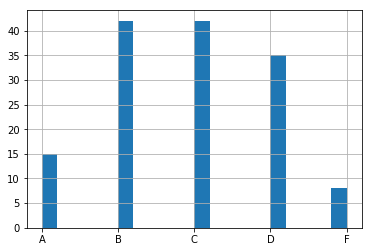

In [180]:
read['2017 _OG'].hist(bins=20)

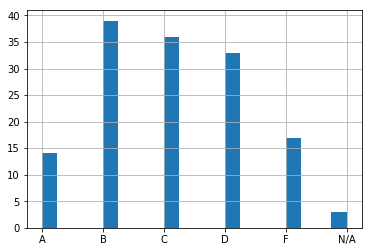

In [181]:
read['2016_OG'].hist(bins=20)

In [212]:
#Printing out all the Enrollment Numbers for Each District
print(read.loc[:,"Enrollment"].sum())
#Printing out all the Official Grades for a Given District in Order for 2017
print(read.loc[:,"2017 _OG"].sum())
#Printing out all the Official Grades for a Given District in Order for 2016
read.loc[:,"2016_OG"].sum()

1,2983,2621,0531,7781,0787821,8651,1656,1841,3042,9662,5333,5831,0325071,3701,4872,6753,5653,2623021,4955101,7014,0012,7522,90533,5375269151,2169951,6885882,2891,3334,0822,0105,0452,7414,0166,3004,55214,7734,2891,5466,0045881,3722,8121,7571,7083,5909,27826,9481,2821,4201228,6721,1002,4722,8469,8936,5063,1772,2112,9126,9782,3928313,2213,2852,8745,30057713,1712,0613,1442,6765,5571652,3582641,9333,4603,3611,3122,1841,8159371,0841,4522,4751,2931,6355,7966344,2977,2562,0214,2223,2401,0894,1121,0823,6172,3003,6671,8552,3991,0721,94019,2052367074,0771,7853,6412,7018704,4261,6752,7855,1752,5563,9462,6493,0782,0956,9952,8301,0198,3111,9411,1383,2951,8181,3301,4033,1477731,953
CBDBCBBBAACCDCDCDDDABDCCDCDADCDADBBCBBFCBBBBDDCCCFBFBBFCCDBDBBABDCCBFDBACBDABCDDFBDDDCCBACDDCCFADABBABCACCBBABDDBDBCCCCCCDBCBFCBDBABDDCDBCBCCC


'CBFCCBBCBACCFDDCFFCACFDBDCCADDDACABBBBFDCBBBDDCDCFCFBAFFDN/ABFCBBBDCDCDFCACBDABCDDN/ABFDFBCBBDDDCCFAFABABBCACBBBBBFDAN/ACBBCCDDDBCBDCBCBBADDCCBDCDDD'

<Container object of 11 artists>

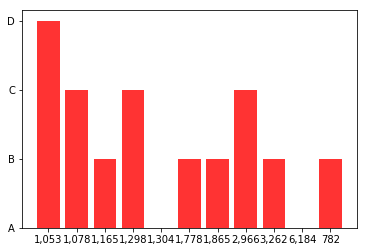

In [197]:
plt.bar(read.loc[0:10,"Enrollment"], read.loc[0:10,"2017 _OG"], color='r',  alpha=.8)


<Container object of 10 artists>

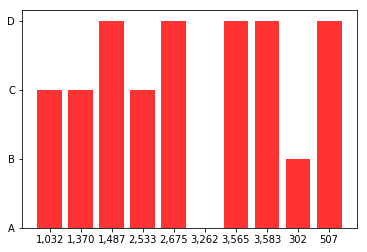

In [198]:
plt.bar(read.loc[11:20,"Enrollment"], read.loc[11:20,"2017 _OG"], color='r',  alpha=.8)

<Container object of 10 artists>

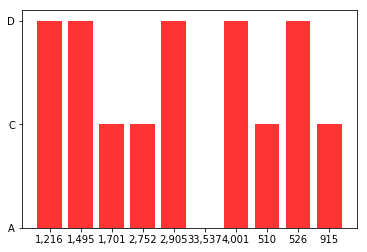

In [199]:
plt.bar(read.loc[21:30,"Enrollment"], read.loc[21:30,"2017 _OG"], color='r',  alpha=.8)

<Container object of 9 artists>

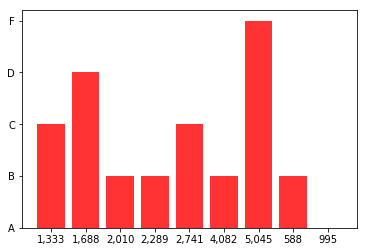

In [200]:
plt.bar(read.loc[31:40,"Enrollment"], read.loc[31:40,"2017 _OG"], color='r',  alpha=.8)

<Container object of 9 artists>

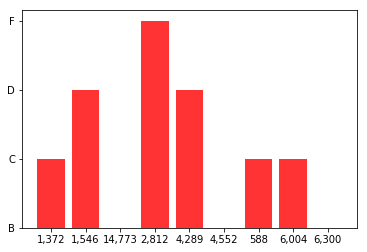

In [230]:
plt.bar(read.loc[41:49,"Enrollment"], read.loc[41:49,"2017 _OG"], color='r',  alpha=.8)

<Container object of 11 artists>

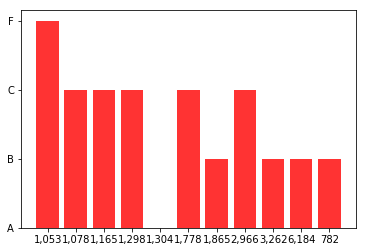

In [203]:
plt.bar(read.loc[0:10,"Enrollment"], read.loc[0:10,"2016_OG"], color='r',  alpha=.8)

<Container object of 10 artists>

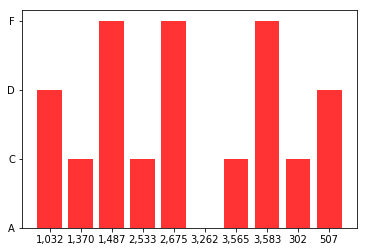

In [204]:
plt.bar(read.loc[11:20,"Enrollment"], read.loc[11:20,"2016_OG"], color='r',  alpha=.8)

<Container object of 10 artists>

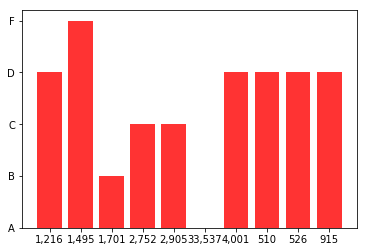

In [205]:
plt.bar(read.loc[21:30,"Enrollment"], read.loc[21:30,"2016_OG"], color='r',  alpha=.8)

<Container object of 9 artists>

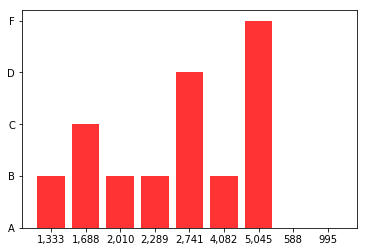

In [206]:
plt.bar(read.loc[31:40,"Enrollment"], read.loc[31:40,"2016_OG"], color='r',  alpha=.8)

<Container object of 9 artists>

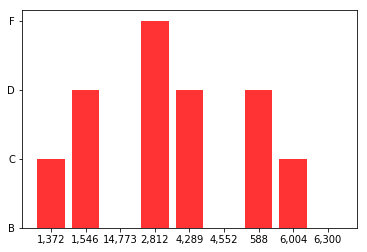

In [231]:
plt.bar(read.loc[41:49,"Enrollment"], read.loc[41:49,"2016_OG"], color='r',  alpha=.8)

In [209]:
officialgrade = gpd.GeoDataFrame(read)
print(stations)

                                                  NAME  FID_12 STATEFP  \
0                             Aberdeen School District      72      28   
1                               Alcorn School District     130      28   
2                         Amite County School District      47      28   
3                                Amory School District      71      28   
4                        Attala County School District     104      28   
5                              Baldwyn School District      52      28   
6                        Bay St. Louis School District     141      28   
7                        Benton County School District     109      28   
8                        Biloxi Public School District      79      28   
9                           Booneville School District      51      28   
10                          Brookhaven School District     101      28   
11                      Calhoun County School District     118      28   
12                       Canton Public

Now that we have the color coordinated representation of the official grades with the counties, Geopandas gives us a way to better understand the choosing of colors to better understand the trend. Once can simply modify the choice of color by using the "cmap" which is short for colormaps. To learn more about colormaps, visit https://matplotlib.org/users/colormaps.html. From here, one can find a good representation in 3D colorspace for a given data set. The best choice of a colormap varies depending on a given data set. It is important to look to see what works best for your given audience. Below we implement the cmap function on the same officialgrade data set from 2016.

With the implementation of the colormap, it is also important to understand the colortrend and which way is it descending or ascending (depending on how one wants to look at it). To fully take advantage of the understanding of the colormap feature, one should implement the legend feature. This allows a label assignment to populate directly onto the map that way direct understanding of a county can directly be traced.

The ordering of the geospatial plots below are as follows
1. 2016 Official Grade Data
2. 2016 Official Grade Data + Specific Colormap+ Legend
3. 2016 Official Grade Data + Specific Colormap
4. 2017 Official Grade Data
5. 2017 Official Grade Data + Specific Colormap + Legend
6. 2017 Official Grade Data + Specific Colormap

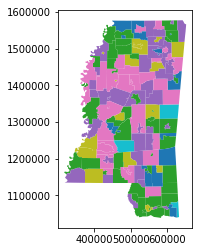

In [244]:
officialgrade.plot(column = '2016_OG',categorical=True);

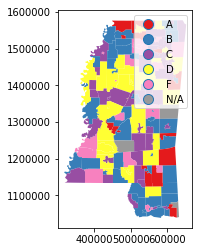

In [227]:
officialgrade.plot(column = '2016_OG',categorical=True, cmap='Set1', legend=True);


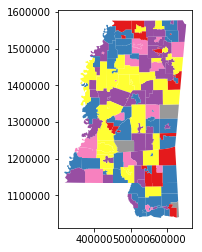

In [243]:
officialgrade.plot(column = '2016_OG',categorical=True, cmap='Set1',)# legend=True);

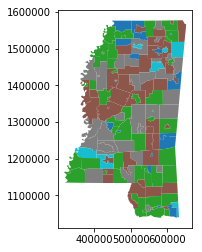

In [187]:
officialgrade.plot(column = '2017 _OG',categorical=True);

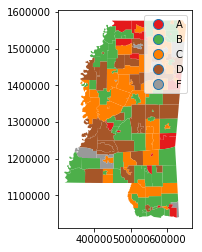

In [241]:
officialgrade.plot(column = '2017 _OG',categorical=True, cmap='Set1', alpha=1, legend=True);

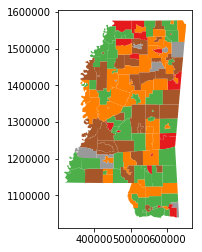

In [242]:
officialgrade.plot(column = '2017 _OG',categorical=True, cmap='Set1', alpha=1,)# legend=True);

To manipulate the placement of the legend paramter (to not coverup data), one can visit this website. https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.legend.html

# Summary Conclusion and References
This tutorial looked at how data can be analyzed graphically and geospatially in Python. With this tutorial the goal was to not only show a technique of analyzing and visualing data in python but also provide a meaningful example along the way. This project provided the following:
1. loading and analyzing data to understand before using
2. reading in a specific shapefile to be used for geopandas application
3. represent data geospatially in a generic way
4. explanation of how to convert csv file into shapefile
5. merge two datasets
6. graphically and geospatially showcase data to gain further insight into the data


The project focused data was obtain from Mississippi databases as the author was curious about the state's datasets. Potentially future directions of this work could begin to look at comparing this data with the highest ranking neighbor state (Tennessee-36th), a middle of the pack state (Colorado-25th), and a shoot for the stars state (either Massachusetts, New Jersey, or Vermont). Parameters of interest may be analyzing public school expenditures and proficiency scores to see if there is some alignment. The human inclination is to simply pour cash onto an issue to solve it, but is this the case? Does Vermont spend that more more on public schools than Mississippi? This would be questions the data could answer. Also looking at the superior districts of Vermont versus the superior districts in Mississippi and other factors that cause one to be rated #3 versus the other being rated #48 (rankings were based upon the USA Today report).